<a href="https://colab.research.google.com/github/shunrei9841-sudo/Guadalupe/blob/main/Ejercicio%2009-12-25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:76: SyntaxWarning: invalid escape sequence '\s'
<>:76: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-9354415.py:76: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(xx, u_exact_func(xx), label='Solución Exacta $u(x)=x+\sin(x)$', color='blue', linewidth=3)


### 1. Residuoo y Aproximación ###
Residuo R(x) = alpha_2*x**2 + 2*alpha_2 + alpha_3*x**3 + 6*alpha_3*x + x
----------------------------------------
### 2. Solución por Mínimos Cuadrados ###
Coeficiente alpha_2 (a2) ≈ -0.0153821
Coeficiente alpha_3 (a3) ≈ -0.142639
----------------------------------------
Solución Aproximada u_N(x) (N=3):
-0.142639*x**3 - 0.0153821*x**2 + 2.0*x
----------------------------------------
Error L2 (Integral Cuadrática) ≈ 0.0006832


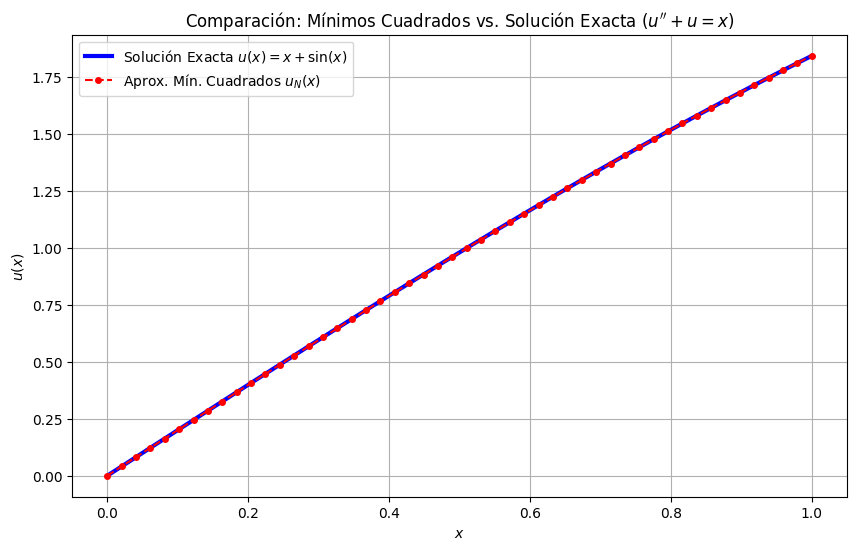

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# 1. Definición de Variables y EDO

# Variables simbólicas
x = sp.Symbol('x')
a2, a3 = sp.symbols('alpha_2 alpha_3') # Coeficientes libres a determinar

# Solución de prueba de grado 3 con condiciones iniciales aplicadas (a0=0, a1=2)
u_N = 2*x + a2*x**2 + a3*x**3

# Derivadas de la solución de prueba
u_N_double_prime = sp.diff(u_N, x, 2) # 2*a2 + 6*a3*x

# Residuoo R(x) = u_N'' + u_N - x
R = u_N_double_prime + u_N - x
R_simplified = sp.simplify(R)
# R(x) = 2*a2 + x*(1 + 6*a3) + a2*x**2 + a3*x**3

print("### 1. Residuoo y Aproximación ###")
print(f"Residuo R(x) = {R_simplified}")
print("-" * 40)

#  2. Condiciones de Mínimos Cuadrados
# Las condiciones son: Integral[ R * (dR/da_j) dx ] = 0 sobre [0, 1]

# Derivadas parciales del Residuuo R respecto a los coeficientes libres
dR_da2 = sp.diff(R, a2) # -> 2 + x**2
dR_da3 = sp.diff(R, a3) # -> 6*x + x**3

# Ecuación 1: Integral de R * (dR/da2) dx = 0
Eq1_Integrand = R * dR_da2
Eq1 = sp.integrate(Eq1_Integrand, (x, 0, 1))

# Ecuación 2: Integral de R * (dR/da3) dx = 0
Eq2_Integrand = R * dR_da3
Eq2 = sp.integrate(Eq2_Integrand, (x, 0, 1))

# Resolver el sistema de ecuaciones para a2 y a3
# Usamos [a2, a3] en solve para garantizar la salida como diccionario.
sol_constantes = sp.solve([sp.Eq(Eq1, 0), sp.Eq(Eq2, 0)], [a2, a3])

# Acceso a los valores por la clave (el símbolo)
a2_val = sol_constantes[a2].evalf()
a3_val = sol_constantes[a3].evalf()

# Solución Aproximada u_N(x)
u_N_approx = u_N.subs({a2: a2_val, a3: a3_val})

print("### 2. Solución por Mínimos Cuadrados ###")
print(f"Coeficiente alpha_2 (a2) ≈ {a2_val.evalf(6)}")
print(f"Coeficiente alpha_3 (a3) ≈ {a3_val.evalf(6)}")
print("-" * 40)
print(f"Solución Aproximada u_N(x) (N=3):\n{u_N_approx.evalf(6)}")
print("-" * 40)

#3. Comparación y Gráfico (Opcional)

# Solución Exacta: u(x) = x + sin(x)
u_exact_sym = x + sp.sin(x)
u_N_func = sp.lambdify(x, u_N_approx, "numpy")
u_exact_func = sp.lambdify(x, u_exact_sym, "numpy")

# Evaluar el error L2 (integral cuadrática) en el intervalo [0, 1]
error_integrand = (u_exact_sym - u_N_approx)**2
error_L2_sq = sp.integrate(error_integrand, (x, 0, 1))
error_L2 = sp.sqrt(error_L2_sq).evalf()

print(f"Error L2 (Integral Cuadrática) ≈ {error_L2.evalf(4)}")

# Graficar la comparación
xx = np.linspace(0, 1, 50)
plt.figure(figsize=(10, 6))
plt.plot(xx, u_exact_func(xx), label='Solución Exacta $u(x)=x+\sin(x)$', color='blue', linewidth=3)
plt.plot(xx, u_N_func(xx), label='Aprox. Mín. Cuadrados $u_N(x)$', color='red', linestyle='--', marker='o', markersize=4)
plt.title('Comparación: Mínimos Cuadrados vs. Solución Exacta ($u\'\' + u = x$)')
plt.xlabel('$x$')
plt.ylabel('$u(x)$')
plt.legend()
plt.grid(True)
plt.show()